In [1]:
import os
import time
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


print(tf.__version__)

2.17.0


Primera prueba - Test de entrenamiento

In [2]:
# Parámetros
basePath = '../data'  # Ajusta la ruta si es necesario
train_dir = os.path.join(basePath, 'preprocessed', 'train')  # Ruta para entrenar
val_dir = os.path.join(basePath, 'preprocessed', 'validation')  # Ruta para validar
batch_size = 16
img_size = (224, 224)
num_classes = 15
epochs = 20

In [3]:
# Generadores de datos
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '../data/preprocessed/train',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    '../data/preprocessed/validation',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

# Cargar el modelo base preentrenado
base_model = VGG16(
    include_top=False,
    input_shape=(224, 224, 3),
    weights='imagenet'  # Cargar los pesos preentrenados en ImageNet
)

# Congelar la red base (no entrenamos las capas preentrenadas)
base_model.trainable = False

# Añadir capas superiores para nuestra clasificación
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Crear el modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early Stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitorea la pérdida de validación
    patience=10,         # Número de épocas sin mejora antes de detener el entrenamiento
    restore_best_weights=True  # Restaura los mejores pesos al final del entrenamiento
)

# Callback para registrar el tiempo por época
class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

time_callback = TimeHistory()

# Entrenar el modelo con Early Stopping y el callback de tiempo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs,
    callbacks=[early_stopping, time_callback]
)

loss, accuracy = model.evaluate(validation_generator)
print(f"Pérdida en validación: {loss}")
print(f"Precisión en validación: {accuracy}")

# Guardar el modelo entrenado
model.save('../models/reconocimiento_facial_15_personas_VGG16.keras')

Found 4800 images belonging to 15 classes.
Found 1200 images belonging to 15 classes.
Epoch 1/20


d:\Ing. Sistemas y Computacion\Semestre VIII\Tópicos Especiales I\VA\Reconocimiento-Facial\Reconocimiento-Facial\VA\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


300/300 ━━━━━━━━━━━━━━━━━━━━ 332s 1s/step - accuracy: 0.3638 - loss: 2.0779 - val_accuracy: 0.8842 - val_loss: 0.7247
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 170us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/20


C:\Users\rodfe\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
d:\Ing. Sistemas y Computacion\Semestre VIII\Tópicos Especiales I\VA\Reconocimiento-Facial\Reconocimiento-Facial\VA\Lib\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


300/300 ━━━━━━━━━━━━━━━━━━━━ 328s 1s/step - accuracy: 0.8236 - loss: 0.7455 - val_accuracy: 0.8783 - val_loss: 0.4400
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 37us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 326s 1s/step - accuracy: 0.8892 - loss: 0.4158 - val_accuracy: 0.9233 - val_loss: 0.2563
Epoch 6/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 40us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 326s 1s/step - accuracy: 0.9257 - loss: 0.2881 - val_accuracy: 0.9608 - val_loss: 0.1690
Epoch 8/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 37us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 327s 1s/step - accuracy: 0.9494 - loss: 0.1985 - val_accuracy: 0.9692 - val_loss: 0.1335
Epoch 10/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 37us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 326s 1s/step - accuracy: 0.9602 - loss: 0.1634 - val_accuracy: 0.9475 - v

Evaluacion del Modelo

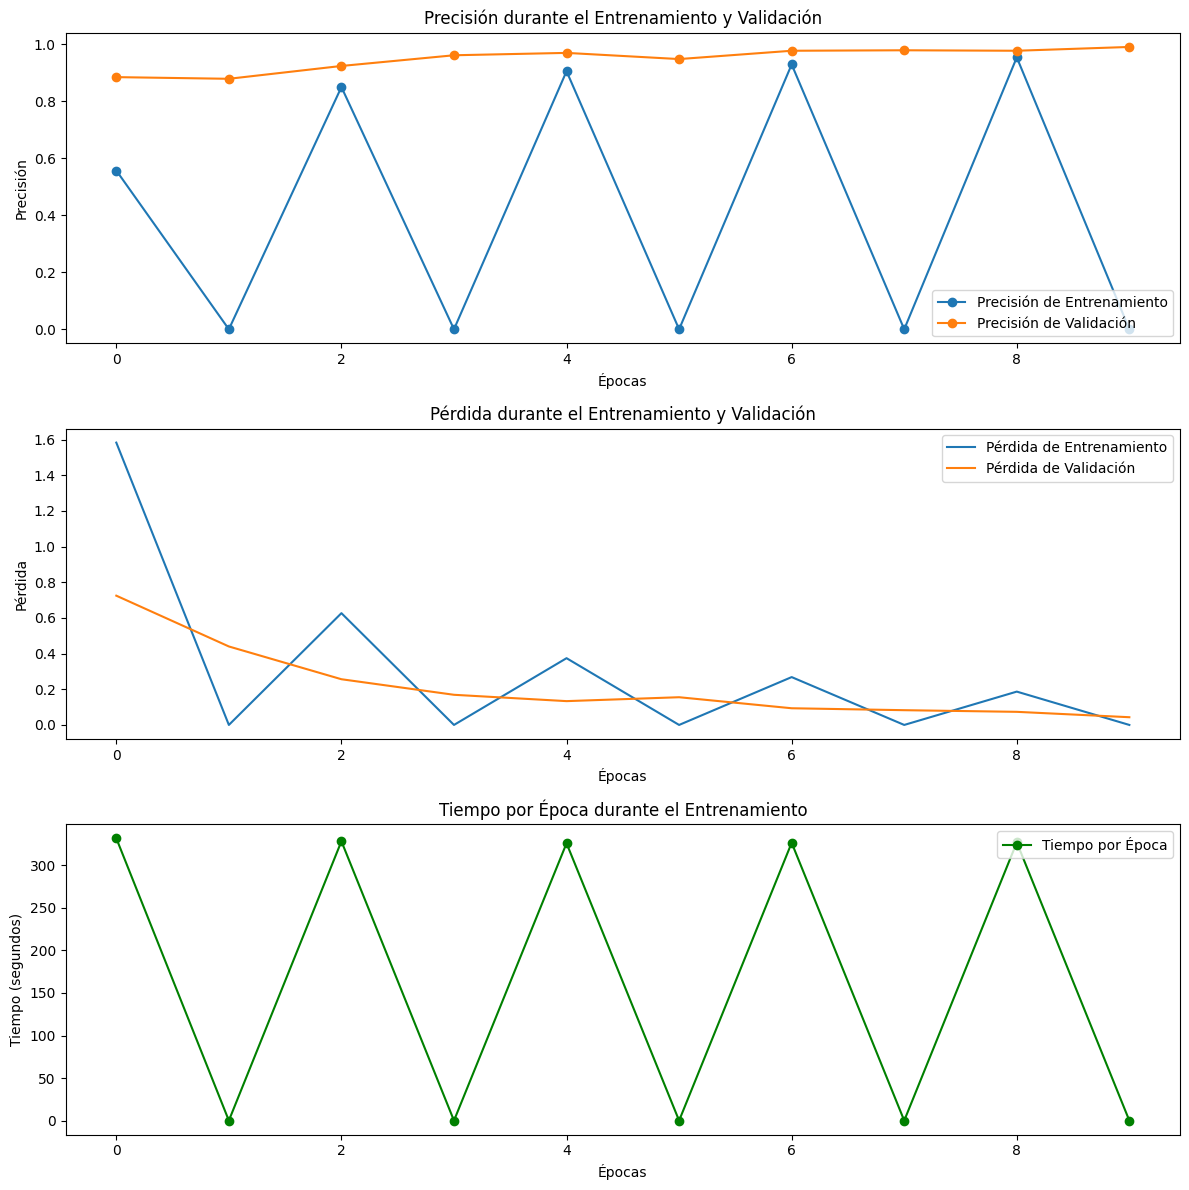

In [4]:
# Función para graficar el rendimiento del modelo
def plot_training(history, epoch_times):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # Ensure all lists have the same length
    min_length = min(len(acc), len(val_acc), len(loss), len(val_loss), len(epoch_times))
    acc = acc[:min_length]
    val_acc = val_acc[:min_length]
    loss = loss[:min_length]
    val_loss = val_loss[:min_length]
    epoch_times = epoch_times[:min_length]
    
    epochs_range = range(min_length)  # Ensure epochs_range matches the length of history data

    # Graficar la precisión
    plt.figure(figsize=(12, 12))
    
    plt.subplot(3, 1, 1)
    plt.plot(epochs_range, acc, 'o-',label='Precisión de Entrenamiento')
    plt.plot(epochs_range, val_acc, 'o-',label='Precisión de Validación')
    plt.legend(loc='lower right')
    plt.title('Precisión durante el Entrenamiento y Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')

    # Graficar la pérdida
    plt.subplot(3, 1, 2)
    plt.plot(epochs_range, loss, label='Pérdida de Entrenamiento')
    plt.plot(epochs_range, val_loss, label='Pérdida de Validación')
    plt.legend(loc='upper right')
    plt.title('Pérdida durante el Entrenamiento y Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')

    # Graficar el tiempo por época
    plt.subplot(3, 1, 3)
    plt.plot(epochs_range, epoch_times, 'o-', label='Tiempo por Época', color='green')
    plt.legend(loc='upper right')
    plt.title('Tiempo por Época durante el Entrenamiento')
    plt.xlabel('Épocas')
    plt.ylabel('Tiempo (segundos)')

    # Mostrar las gráficas
    plt.tight_layout()
    plt.show()

# Llamar la función para graficar el rendimiento
plot_training(history, time_callback.times)